In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.simplefilter("ignore") # Ignore all the warning messages

In [3]:
df = pd.read_csv("train.csv")
df.head()
#lead_time : difference in days when the person has booked the hotel and when that person arrived.

,Unnamed: 0,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,25629,INN25630,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,14473,INN14474,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,23720,INN23721,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,5843,INN05844,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,18709,INN18710,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [4]:
df.columns

Index(['Unnamed: 0', 'Booking_ID', 'no_of_adults', 'no_of_children',
       'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan',
       'required_car_parking_space', 'room_type_reserved', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'market_segment_type',
       'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests', 'booking_status'],
      dtype='object')

In [5]:
df.drop(columns=["Unnamed: 0", "Booking_ID"], inplace=True)

In [6]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [7]:
df.shape

(29020, 18)

In [8]:
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(7661)

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.shape

(21359, 18)

In [12]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [13]:
df["booking_status"].value_counts()

booking_status
Not_Canceled    15231
Canceled         6128
Name: count, dtype: int64

##### OUR data is imbalanced

In [14]:
cat_cols = ['type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'market_segment_type', 'repeated_guest', 'booking_status']

num_cols = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests',]

### DATA ANALYSIS

In [15]:
data = df.copy()

In [16]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


##### UNIVARIATE ANALYSIS

In [17]:
def num_plot_dist(df, num_features):
    fig, axes = plt.subplots(len(num_features), 2, figsize=(15, len(num_features)*5))
    if len(num_features) == 1:
        axes = [axes]
    
    for i, column in enumerate(num_features):
        sns.histplot(data=df, x=column, ax=axes[i][0], kde=True, palette="Blues")
        axes[i][0].set_title(f"Histogram for {column}")

        sns.boxplot(data=df, x=column, ax=axes[i][1], palette="Blues")
        axes[i][1].set_title(f"Boxplot for {column}")
    
    plt.tight_layout()
    plt.show()

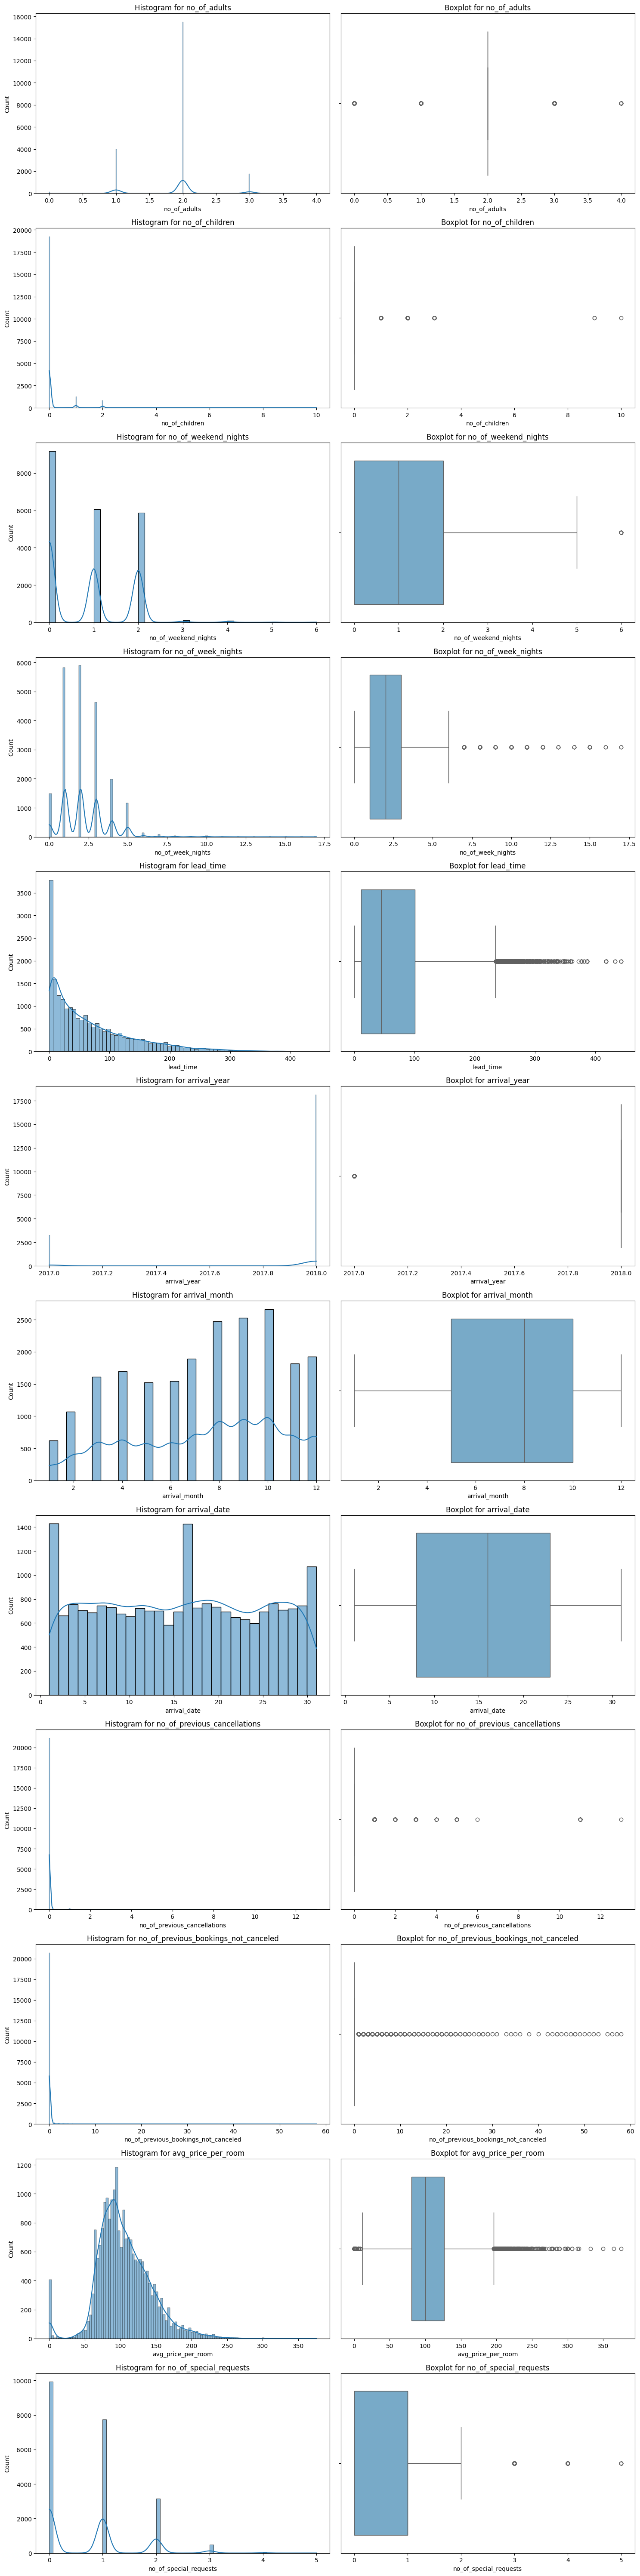

In [18]:
num_plot_dist(data, num_cols)

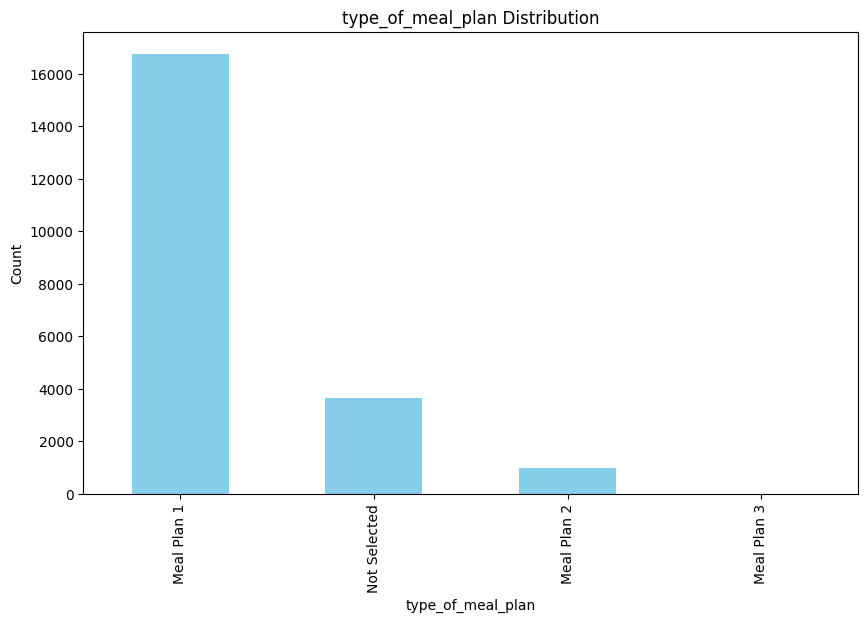

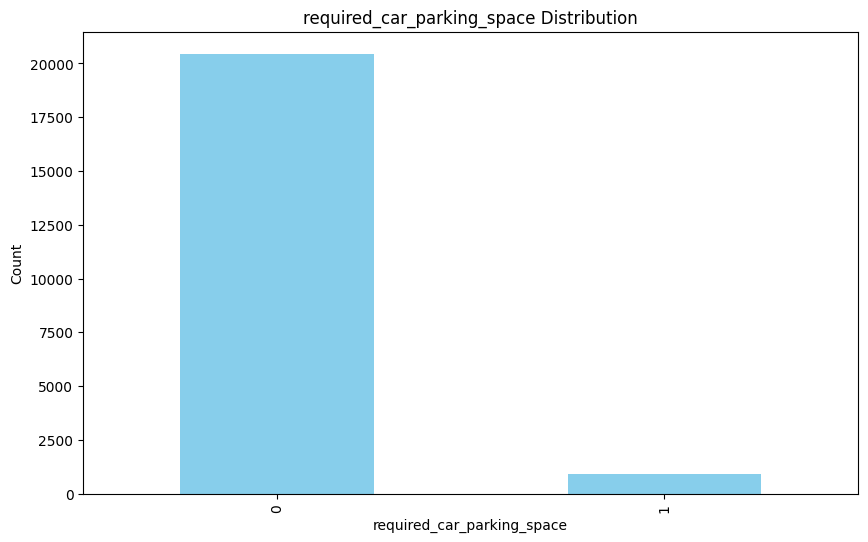

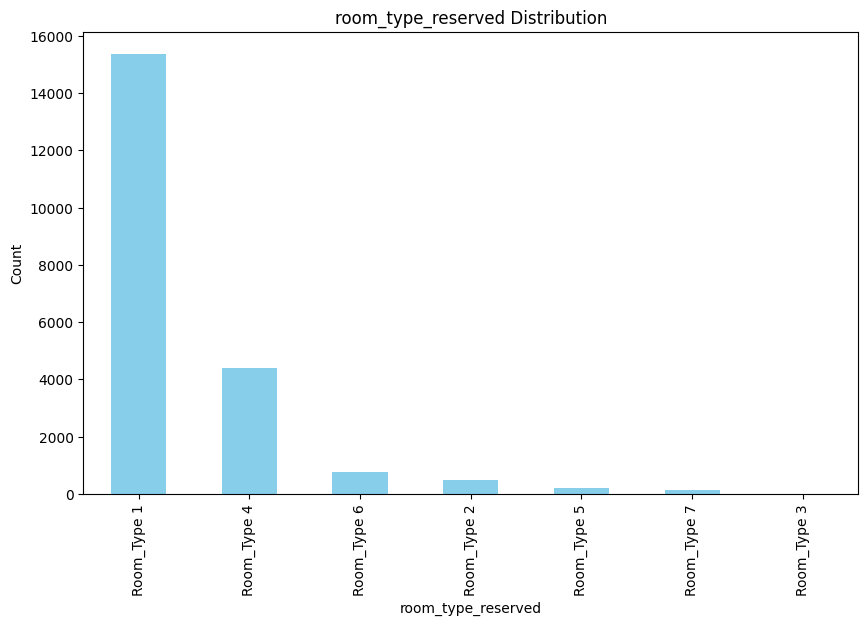

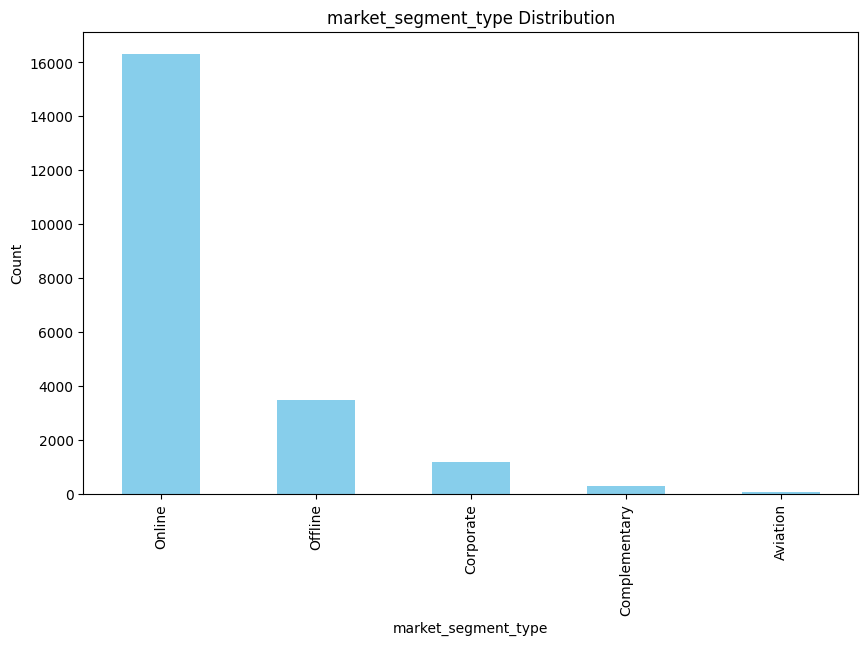

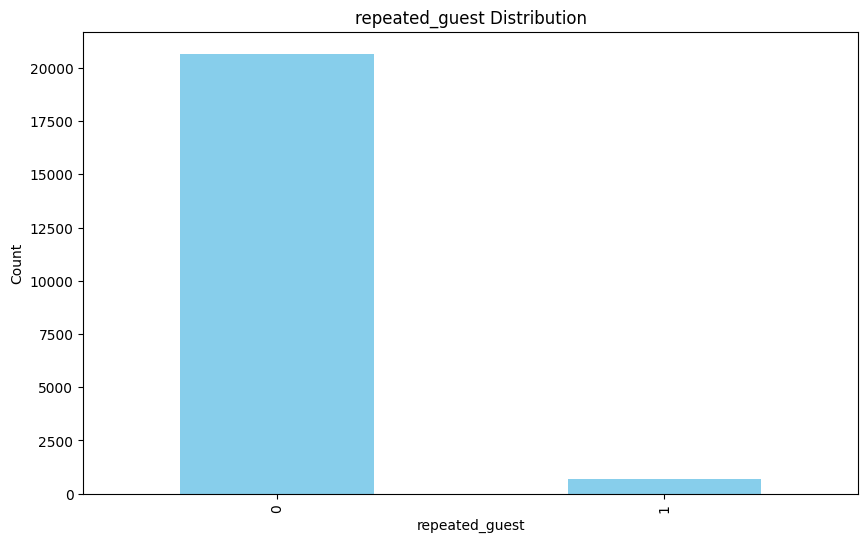

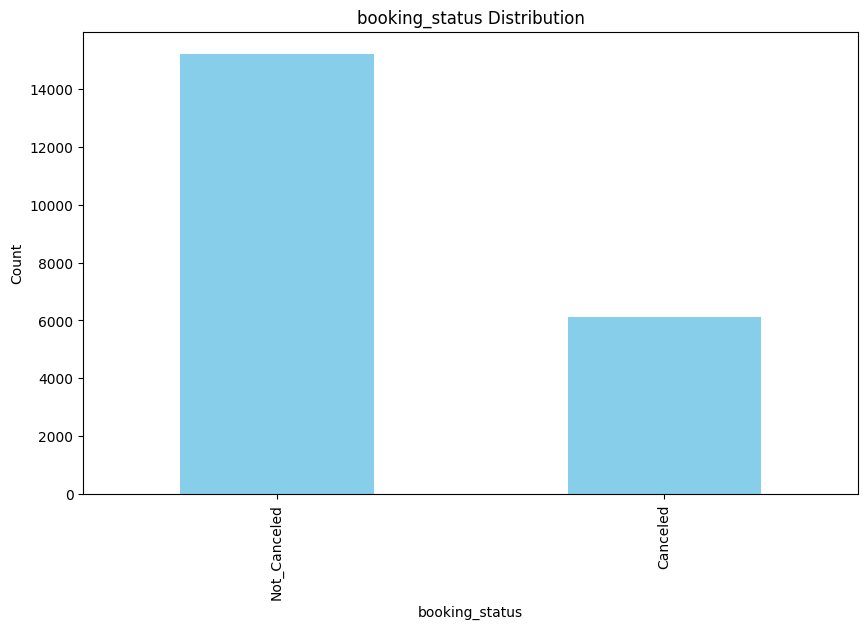

In [19]:
for cat_feature in cat_cols:
    plt.figure(figsize=(10, 6))
    data[cat_feature].value_counts().plot(kind="bar", color='skyblue')
    plt.title(f"{cat_feature} Distribution")
    plt.xlabel(cat_feature)
    plt.ylabel("Count")
    plt.show()

#### BIVARIATE ANALYSIS

In [20]:
def plot_bivariate_num(df, target, num_features):
    num_plots = len(num_features)
    num_rows = (num_plots+1)//2

    fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows*5))

    axes = axes.flatten()

    for i, column in enumerate(num_features):
        sns.boxplot(x=target, y=column, ax=axes[i], data= df, palette="Blues")
        axes[i].set_title(f"{column} VS {target}")
    plt.tight_layout()
    plt.show()

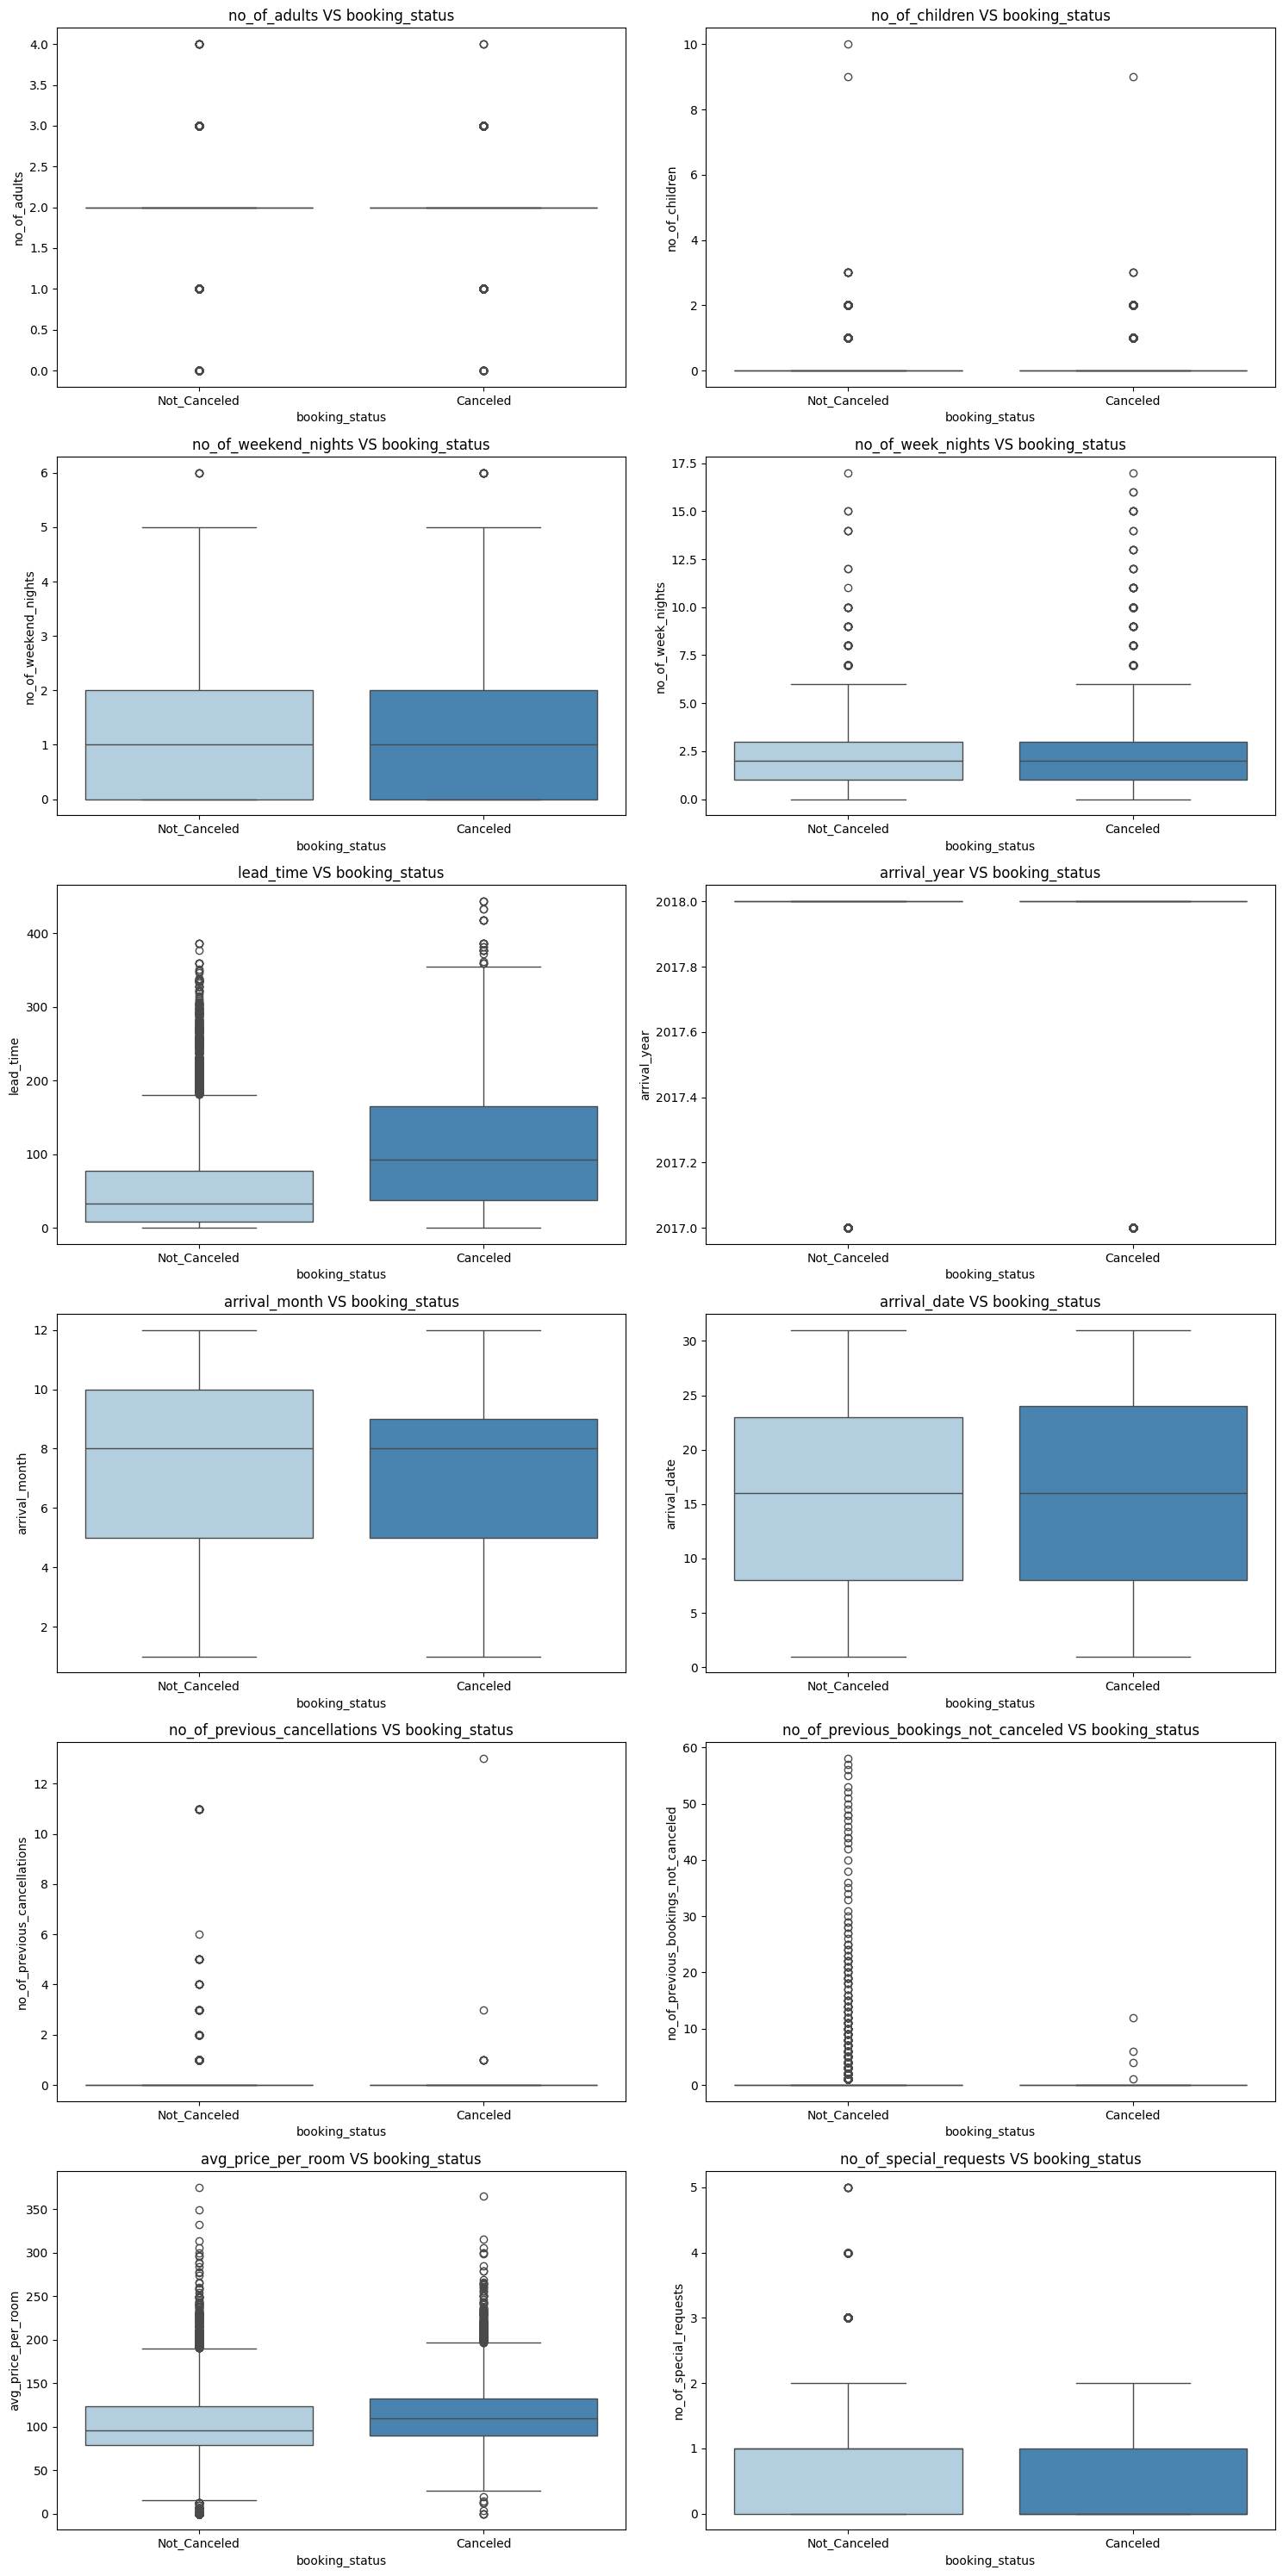

In [21]:
plot_bivariate_num(data, 'booking_status', num_cols)

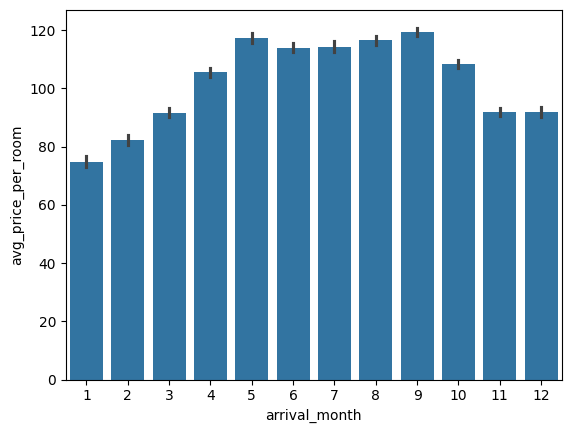

In [22]:
sns.barplot(x='arrival_month', y="avg_price_per_room", data=data)
plt.show()

In [23]:
def plot_bivariate_cat(df, target, cat_features):
    num_features = len(cat_features)
    num_rows = (num_features +1)//2

    fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows*5))
    axes = axes.flatten()

    for i, feature in enumerate(cat_features):
        sns.countplot(x=feature, hue=target, ax=axes[i], data= df, palette="Set2")
        axes[i].set_title(f"{feature} VS {target}")
        axes[i].tick_params(axis='x', rotation=90)
        
    plt.tight_layout()
    plt.show()

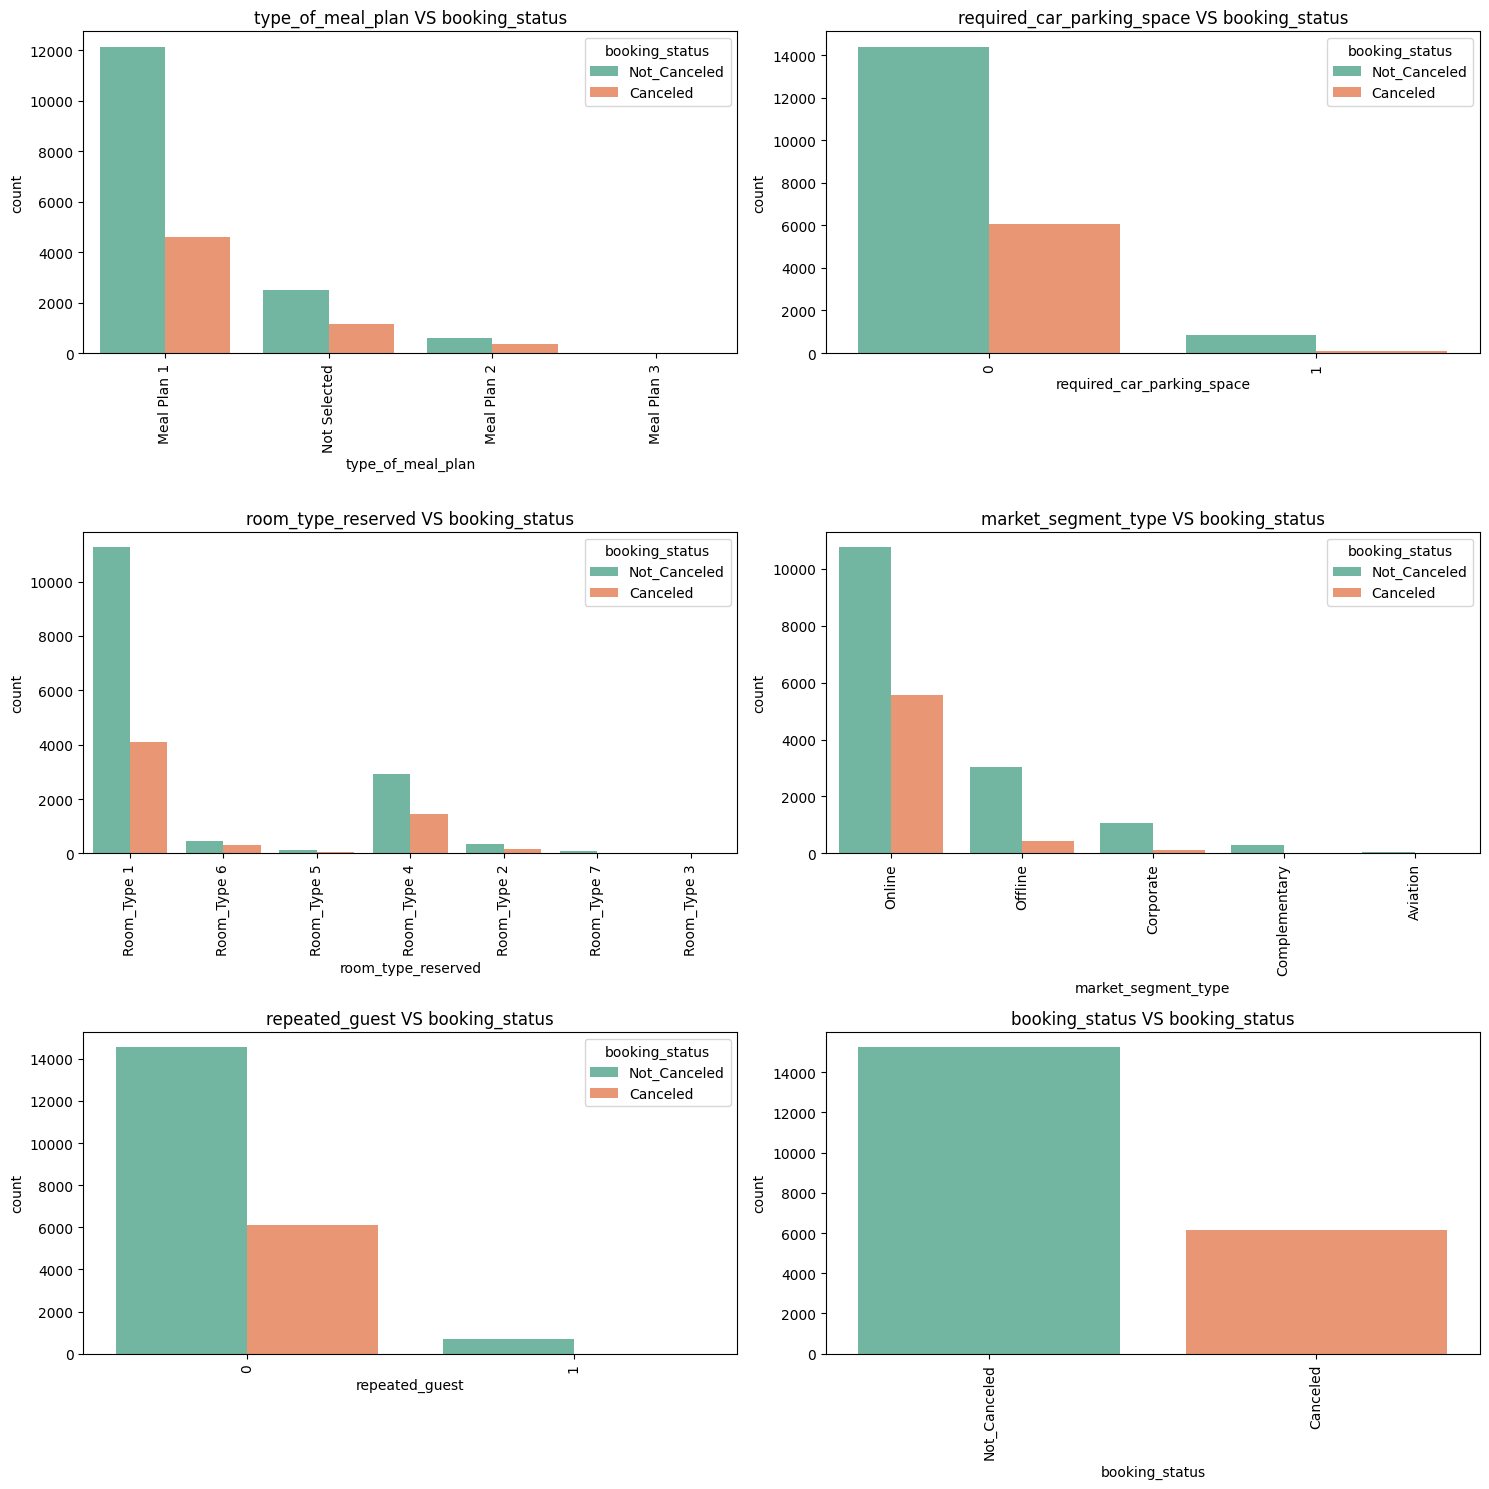

In [24]:
plot_bivariate_cat(data, 'booking_status', cat_cols)

##### DATA PROCESSING

In [25]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21359 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21359 non-null  int64  
 1   no_of_children                        21359 non-null  int64  
 2   no_of_weekend_nights                  21359 non-null  int64  
 3   no_of_week_nights                     21359 non-null  int64  
 4   type_of_meal_plan                     21359 non-null  object 
 5   required_car_parking_space            21359 non-null  int64  
 6   room_type_reserved                    21359 non-null  object 
 7   lead_time                             21359 non-null  int64  
 8   arrival_year                          21359 non-null  int64  
 9   arrival_month                         21359 non-null  int64  
 10  arrival_date                          21359 non-null  int64  
 11  market_segment_type 

##### LABEL ENCODING

In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
label_encoder = LabelEncoder()

mappings = {}

for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])

    mappings[col] = {label:code for label, code in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))}
    

In [29]:
mappings

{'type_of_meal_plan': {'Meal Plan 1': np.int64(0),
  'Meal Plan 2': np.int64(1),
  'Meal Plan 3': np.int64(2),
  'Not Selected': np.int64(3)},
 'required_car_parking_space': {np.int64(0): np.int64(0),
  np.int64(1): np.int64(1)},
 'room_type_reserved': {'Room_Type 1': np.int64(0),
  'Room_Type 2': np.int64(1),
  'Room_Type 3': np.int64(2),
  'Room_Type 4': np.int64(3),
  'Room_Type 5': np.int64(4),
  'Room_Type 6': np.int64(5),
  'Room_Type 7': np.int64(6)},
 'market_segment_type': {'Aviation': np.int64(0),
  'Complementary': np.int64(1),
  'Corporate': np.int64(2),
  'Offline': np.int64(3),
  'Online': np.int64(4)},
 'repeated_guest': {np.int64(0): np.int64(0), np.int64(1): np.int64(1)},
 'booking_status': {'Canceled': np.int64(0), 'Not_Canceled': np.int64(1)}}

In [30]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,0,0,0,26,2017,10,17,4,0,0,0,161.00,0,1
1,2,1,1,1,0,0,0,98,2018,7,16,4,0,0,0,121.50,2,1
2,2,0,0,3,0,0,0,433,2018,9,8,3,0,0,0,70.00,0,0
3,2,0,2,5,0,0,0,195,2018,8,8,3,0,0,0,72.25,0,1
4,1,0,0,2,0,0,0,188,2018,6,15,3,0,0,0,130.00,0,0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21359 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21359 non-null  int64  
 1   no_of_children                        21359 non-null  int64  
 2   no_of_weekend_nights                  21359 non-null  int64  
 3   no_of_week_nights                     21359 non-null  int64  
 4   type_of_meal_plan                     21359 non-null  int64  
 5   required_car_parking_space            21359 non-null  int64  
 6   room_type_reserved                    21359 non-null  int64  
 7   lead_time                             21359 non-null  int64  
 8   arrival_year                          21359 non-null  int64  
 9   arrival_month                         21359 non-null  int64  
 10  arrival_date                          21359 non-null  int64  
 11  market_segment_type 

In [32]:
### Multicolinearity - One column in dataset is highly related to another column in dataset
### It negatively affects ML models

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [34]:
X = add_constant(df)

vif_data = pd.DataFrame()

vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [35]:
vif_data
## if the VIF is 5 or >5 then there is Multicolinearity and if VIF is 10 or >10 then there is very high multicolinearity

,feature,VIF
0,const,4.100197e+07
1,no_of_adults,1.341180e+00
2,no_of_children,1.282459e+00
3,no_of_weekend_nights,1.073215e+00
4,no_of_week_nights,1.125260e+00
5,type_of_meal_plan,1.178228e+00
6,required_car_parking_space,1.036105e+00
7,room_type_reserved,1.549859e+00
8,lead_time,1.406287e+00
9,arrival_year,1.288533e+00


#### Our data don't have Multicolinearity

<Axes: >

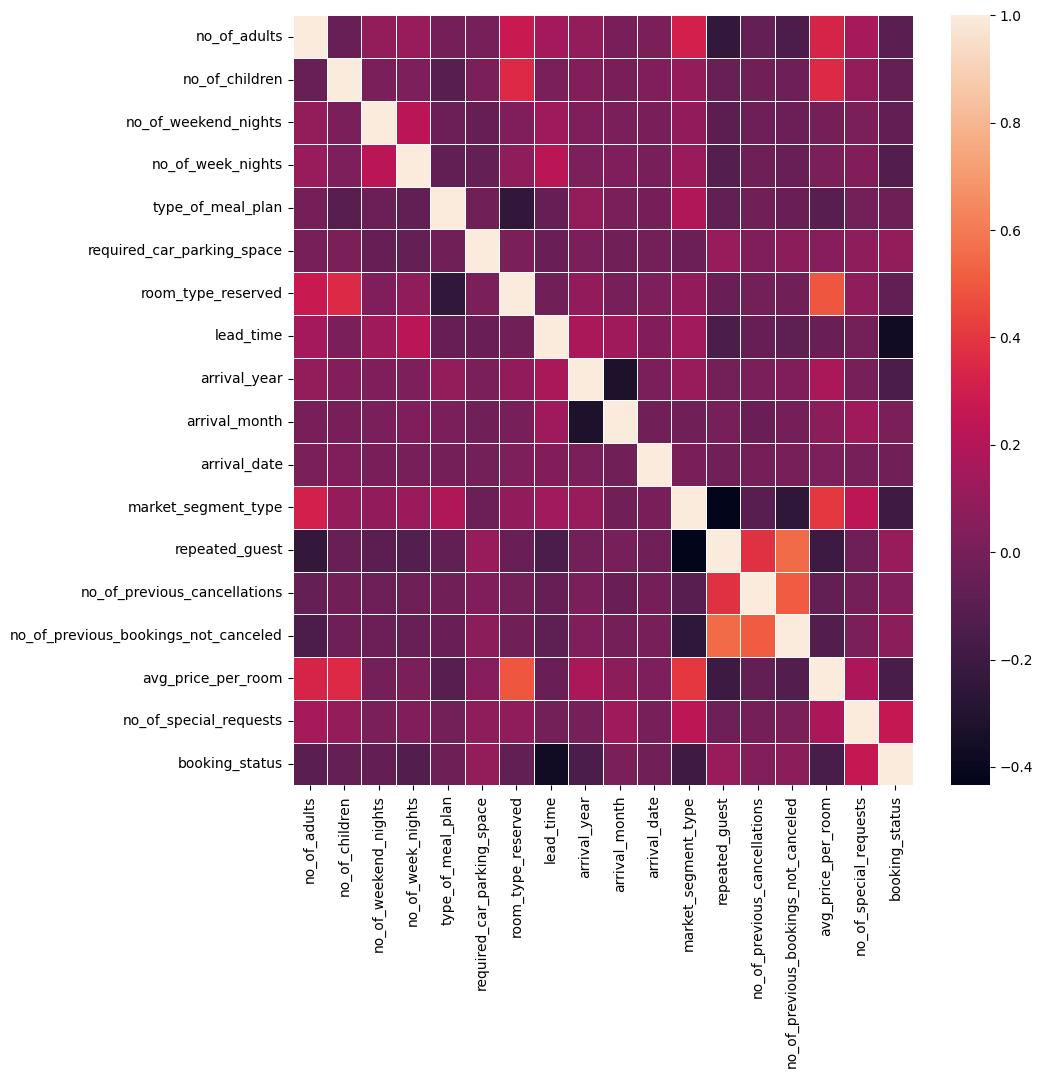

In [36]:
corr = df.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(corr, linewidths=0.5)

In [37]:
#### Skewness

In [38]:
skewness = df.skew()

In [39]:
skewness

no_of_adults                            -0.305652
no_of_children                           4.165696
no_of_weekend_nights                     0.636637
no_of_week_nights                        1.553657
type_of_meal_plan                        1.650716
required_car_parking_space               4.538315
room_type_reserved                       1.392145
lead_time                                1.405258
arrival_year                            -1.953273
arrival_month                           -0.293266
arrival_date                             0.010333
market_segment_type                     -2.333046
repeated_guest                           5.282330
no_of_previous_cancellations            22.001489
no_of_previous_bookings_not_canceled    16.735934
avg_price_per_room                       0.542888
no_of_special_requests                   0.922373
booking_status                          -0.942305
dtype: float64

In [40]:
for col in df.columns:
    if skewness[col]>5:
        df[col] = np.log1p(df[col])

In [41]:
#### Imabalanced Data

In [42]:
df['booking_status'].value_counts()

booking_status
1    15231
0     6128
Name: count, dtype: int64

In [43]:
X = df.drop(columns='booking_status')
y = df['booking_status']

In [44]:
X.shape

(21359, 17)

In [45]:
y.value_counts()

booking_status
1    15231
0     6128
Name: count, dtype: int64

In [46]:
import sys
!{sys.executable} -m pip install imbalanced-learn --upgrade


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [47]:
from imblearn.over_sampling import SMOTE

In [48]:
smote = SMOTE(random_state=42)

X_res, y_res = smote.fit_resample(X, y)

In [49]:
y_res.value_counts()

booking_status
1    15231
0    15231
Name: count, dtype: int64

In [50]:
balanced_df = pd.DataFrame(X_res, columns=X.columns)
balanced_df["booking_status"] = y_res

In [51]:
balanced_df.shape

(30462, 18)

In [52]:
df = balanced_df.copy()

In [53]:
##### Feature Selection

In [54]:
len(df.columns)

18

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
X = df.drop(columns=['booking_status'])
y = df['booking_status']

In [57]:
model = RandomForestClassifier(random_state=42)

model.fit(X, y)

RandomForestClassifier(random_state=42)

In [58]:
feature_importance = model.feature_importances_

In [59]:
feature_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': feature_importance
})

In [60]:
top_feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

In [62]:
top_feature_importance_df

,feature,importance
7,lead_time,0.262735
16,no_of_special_requests,0.183291
15,avg_price_per_room,0.148843
9,arrival_month,0.085975
10,arrival_date,0.084151
11,market_segment_type,0.058039
3,no_of_week_nights,0.045150
2,no_of_weekend_nights,0.030225
4,type_of_meal_plan,0.020150
6,room_type_reserved,0.019544


In [61]:
top_10_features = top_feature_importance_df["feature"].head(10).values

top_10_df = df[top_10_features.tolist() + ['booking_status']]

In [79]:
top_10_df.head()

,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,room_type_reserved,booking_status
0,26,0,161.00,10,17,4,1,2,0,0,1
1,98,2,121.50,7,16,4,1,1,0,0,1
2,433,0,70.00,9,8,3,3,0,0,0,0
3,195,0,72.25,8,8,3,5,2,0,0,1
4,188,0,130.00,6,15,3,2,0,0,0,0


In [81]:
len(top_10_df.columns)

11

In [82]:
df = top_10_df.copy()

#### MODEL SELECTION

In [83]:
!pip install xgboost lightgbm

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 1.8/150.0 MB 6.7 MB/s eta 0:00:23
    --------------------------------------- 2.1/150.0 MB 7.3 MB/s eta 0:00:21
   - -------------------------------------- 5.2/150.0 MB 7.8 MB/s eta 0:00:19
   - -------------------------------------- 6.8/150.0 MB 7.8 MB/s eta 0:00:19
   -- ------------------------------------- 7.6/150.0 MB 7.5 MB/s eta 0:00:20
   -- ------------------------------------- 8.9/150.0 MB 7.1 MB/s eta 0:00:20
   -- ------------------------------------- 10.0/150.0 MB 6.7 MB/s eta 0:00:21
   -- ------------------------------------- 10.5/150.0 MB 6.2 MB/s eta 0:00:23
   --- ------------------------------------ 11.3/150.0 MB 5.9 MB/s eta 0:00:24
   --- ------------------------------------ 11.8/150.0 MB 5.7 MB/s eta 0:00:25
   --- ------------------------------------ 12.6/150.0 MB 5.5 MB/s eta 0:0

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [85]:
X = df.drop(columns=['booking_status'])
y = df['booking_status']

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [87]:
classifiers = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Ada Boost': AdaBoostClassifier(random_state=42),
    'Support Vector Classifier': SVC(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'XGboost': XGBClassifier(random_state=42),
    'LightGBM': LGBMClassifier(random_state=42)
}

In [88]:
metrics = {
    'Model' : [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

In [89]:
for model_name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    metrics['Model'].append(model_name)
    metrics['Accuracy'].append(accuracy)
    metrics['Precision'].append(precision)
    metrics['Recall'].append(recall)
    metrics['F1 Score'].append(f1)


In [90]:
metrics_df = pd.DataFrame(metrics)

In [91]:
metrics_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.893484,0.893659,0.895114,0.894386
1,LogisticRegression,0.777614,0.802683,0.740717,0.770456
2,Gradient Boosting,0.835549,0.819333,0.864169,0.841154
3,Ada Boost,0.804530,0.801025,0.814332,0.807624
4,Support Vector Classifier,0.720335,0.729657,0.706840,0.718068
5,Decision Tree,0.841950,0.851050,0.831922,0.841377
6,KNN,0.779911,0.857675,0.675244,0.755604
7,Naive Bayes,0.772526,0.802660,0.727362,0.763158
8,XGboost,0.871820,0.869074,0.877850,0.873440
9,LightGBM,0.862957,0.849546,0.884691,0.866762


In [92]:
#### Train our RF model

In [93]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [94]:
rf = RandomForestClassifier(random_state=42)

In [98]:
param_grid = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(10, 50),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'bootstrap': [True, False]
}

In [99]:
rnd_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter = 5,
    cv = 5,
    verbose=2,
    random_state=42,
    scoring='accuracy'
)

In [100]:
rnd_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   2.7s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   2.7s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   2.7s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   2.7s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   2.7s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   5.0s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   5.0s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   5.0s
[CV]

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=5,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000023FAD3EB710>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000023FA6DD5FD0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000023FAD3D6150>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000023FAD3E0B50>},
                   random_state=42, scoring='accuracy', verbose=2)

In [101]:
rnd_search.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=33, min_samples_leaf=3,
                       min_samples_split=7, n_estimators=408, random_state=42)

In [102]:
rnd_search.best_params_

{'bootstrap': False,
 'max_depth': 33,
 'min_samples_leaf': 3,
 'min_samples_split': 7,
 'n_estimators': 408}

In [103]:
rnd_search.best_score_

np.float64(0.8727481644774396)

In [104]:
best_rf_model = rnd_search.best_estimator_

In [105]:
y_pred = best_rf_model.predict(X_test)

In [106]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [107]:
accuracy

0.8910224848186443

In [108]:
precision

0.8885658914728682

In [109]:
recall

0.8960912052117264

In [111]:
f1

0.892312682452157

In [112]:
### Save the model

In [113]:
import joblib

In [114]:
joblib.dump(best_rf_model, "random_forest.pkl")

['random_forest.pkl']

In [116]:
loaded_model = joblib.load('random_forest.pkl')

In [117]:
X_train[0:1]

,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,room_type_reserved
4157,190,1,93.5,9,8,4,5,2,0,0


In [119]:
new_data = np.array([190, 1, 93.5, 9, 8, 4, 5, 2, 0, 0]).reshape(1, -1)

In [120]:
predictions = loaded_model.predict(new_data)

In [121]:
predictions

array([1])